Phase 1

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
tr=pd.read_csv('data/train.csv')
ts = pd.read_csv('data/test.csv')

In [14]:
print('train',tr.shape)
print('test', ts.shape)

train (1460, 81)
test (1459, 80)


In [15]:
tr.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [16]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

Phase 2 : Analyse de SalePrice

In [17]:
tr.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

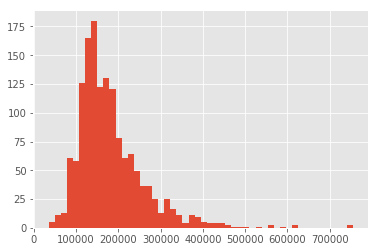

In [18]:
plt.hist(tr.SalePrice, bins=50);

In [19]:
target=np.log(tr.SalePrice)

In [20]:
import seaborn as sns

The skew value is 0.12133506220520406


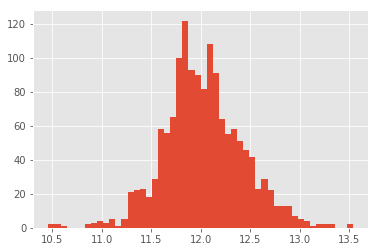

In [21]:
print('The skew value is',target.skew())
plt.hist(target,bins=50);

Phase 3 : Analyse des valeurs numériques

In [22]:
numeric_features = tr.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [23]:
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [24]:
tr.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

OverallQual     1      2      3       4       5       6       7       8   \
SalePrice    50150  60000  86250  108000  133000  160000  200141  269750   

OverallQual      9       10  
SalePrice    345000  432390  


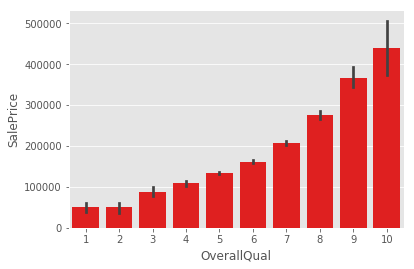

In [25]:
quality_pivot=tr.pivot_table(columns='OverallQual',values='SalePrice', aggfunc='median')
print(quality_pivot)
sns.barplot(x='OverallQual', y='SalePrice', data=tr, color='r');

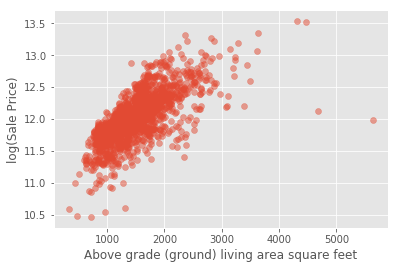

In [26]:
plt.scatter(y=target,x=tr.GrLivArea, alpha=0.5)
plt.ylabel('log(Sale Price)')
plt.xlabel('Above grade (ground) living area square feet');

In [27]:
tr=tr.loc[tr['GrLivArea']<4000]
target=np.log(tr.SalePrice)

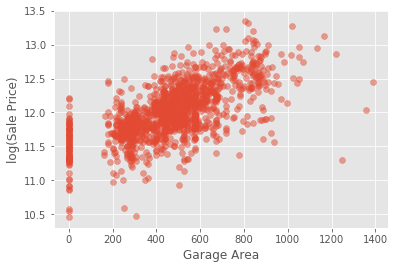

In [28]:
plt.scatter(y=target,x=tr.GarageArea, alpha=0.5)
plt.ylabel('log(Sale Price)')
plt.xlabel('Garage Area');

In [29]:
tr = tr.loc[tr['GarageArea'] < 1200]
target=np.log(tr.SalePrice)

Text(0.5,0,'Total Basement Surface')

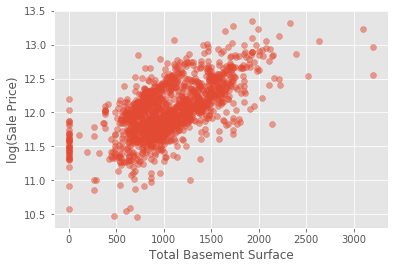

In [30]:
plt.scatter(x=tr['TotalBsmtSF'], y=np.log(tr.SalePrice), alpha=0.5)
plt.ylabel('log(Sale Price)')
plt.xlabel('Total Basement Surface')

In [31]:
tr = tr.loc[tr['TotalBsmtSF'] < 3000]
target=np.log(tr.SalePrice)

In [32]:
pd.DataFrame(tr.corr().loc['SalePrice'].sort_values(ascending=False).iloc[1:10]).transpose()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd
SalePrice,0.799304,0.718761,0.654608,0.650826,0.637124,0.615607,0.557807,0.534472,0.534064


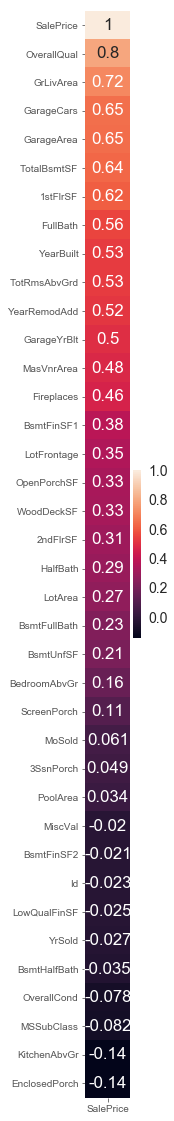

In [33]:
plt.subplots(figsize=(1,20))
sns.set(font_scale=1.4)
#plt.xticks(rotation=90) 
sns.heatmap(pd.DataFrame(tr.corr().loc['SalePrice'].sort_values(ascending=False)), annot=True)

Phase 3 : Categorical

In [34]:
nulls = pd.DataFrame(tr.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1444
MiscFeature,1396
Alley,1358
Fence,1169
FireplaceQu,689
LotFrontage,257
GarageCond,81
GarageType,81
GarageYrBlt,81


In [35]:
categoricals = tr.select_dtypes(exclude=[np.number])
pd.set_option("display.max_columns",50)
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1449,1449,91,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1441,1449,1449,1449,1412,1412,1411,1412,1412,1449,1449,1449,1448,1449,1449,760,1368,1368,1368,1368,1449,5,280,53,1449,1449
unique,5,2,2,4,4,2,5,3,25,9,7,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1141,1444,50,920,1304,1448,1044,1372,225,1252,1436,1210,719,1137,1425,512,501,861,905,1272,638,647,1300,949,428,1247,1417,731,1354,1323,733,1349,373,862,605,1300,1315,1329,2,156,48,1261,1192


In [36]:
def encode(myCol, myDict):
    return myCol.apply(lambda x : myDict[x])
#LotShape
myCol='LotShape'
myDict={'Reg':0,'IR1':1,'IR2':2,'IR3':3}
tr[myCol]=encode(tr[myCol],myDict)
ts[myCol]=encode(ts[myCol],myDict)
#HeatingQC
myCol='HeatingQC'
myDict={'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
tr[myCol]=encode(tr[myCol],myDict)
ts[myCol]=encode(ts[myCol],myDict)
#GarageFinish
myCol='GarageFinish'
myDict={'Unf':0,'RFn':1,'Fin':2}
tr[myCol].fillna('Unf', inplace=True)
ts[myCol].fillna('Unf', inplace=True)
tr[myCol]=encode(tr[myCol],myDict)
ts[myCol]=encode(ts[myCol],myDict)
#BsmtQual
myCol='BsmtQual'
tr[myCol].fillna('TA', inplace=True)
ts[myCol].fillna('TA', inplace=True)
myDict={'TA':0,'Fa':0,'Gd':1,'Ex':1}
tr[myCol]=encode(tr[myCol],myDict)
ts[myCol]=encode(ts[myCol],myDict)
#BsmtFinType1
myCol='BsmtFinType1'
tr[myCol].fillna('Unf', inplace=True)
ts[myCol].fillna('Unf', inplace=True)
myDict={'ALQ':0,'Unf':0,'Rec':0,'BLQ':0,'LwQ':0,'GLQ':1,'nan':0}
tr[myCol]=encode(tr[myCol],myDict)
ts[myCol]=encode(ts[myCol],myDict)

In [94]:
Xtemp = tr.select_dtypes(include=[np.number]).fillna(tr.select_dtypes(include=[np.number]).median()).drop('SalePrice',axis=1)

Xtemp


,Id,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,0,7,5,2003,2003,196.0,1,1,706,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,1,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,0,6,8,1976,1976,0.0,1,0,978,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,1,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,1,7,5,2001,2002,162.0,1,1,486,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,1,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,1,7,5,1915,1970,0.0,0,0,216,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,1,8,5,2000,2000,350.0,1,1,655,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,1,3,836,192,84,0,0,0,0,0,12,2008
5,6,50,85.0,14115,1,5,5,1993,1995,0.0,1,1,732,0,64,796,4,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,0,2,480,40,30,0,320,0,0,700,10,2009
6,7,20,75.0,10084,0,8,5,2004,2005,186.0,1,1,1369,0,317,1686,4,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,1,2,636,255,57,0,0,0,0,0,8,2007
7,8,60,69.0,10382,1,7,6,1973,1973,240.0,1,0,859,32,216,1107,4,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,1,2,484,235,204,228,0,0,0,350,11,2009
8,9,50,51.0,6120,0,7,5,1931,1950,0.0,0,0,0,0,952,952,3,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,0,2,468,90,0,205,0,0,0,0,4,2008
9,10,190,50.0,7420,0,5,6,1939,1950,0.0,0,1,851,0,140,991,4,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,1,205,0,4,0,0,0,0,0,1,2008


In [141]:
Y = np.log(tr.SalePrice)
#Y = tr.SalePrice
Xtemp = tr.select_dtypes(include=[np.number]).fillna(tr.select_dtypes(include=[np.number]).median()).drop('SalePrice',axis=1)

del Xtemp['Id']

#Xtemp = Xtemp[['OverallCond']]
X = Xtemp.astype('int64')
list_X_num_col_names = X.columns
X.head(10)

#Y = Y * 100

Y = Y.astype('int64')

X = np.array(X)
y = np.array(Y)


Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of
features on an artificial classification task. The red bars are the feature
importances of the forest, along with their inter-trees variability.

As expected, the plot suggests that 3 features are informative, while the
remaining are not.

Feature ranking:
1. feature 19 (0.044661)
2. feature 16 (0.042284)
3. feature 2 (0.041816)
4. feature 14 (0.041479)
5. feature 31 (0.041236)
6. feature 39 (0.041169)
7. feature 13 (0.040631)
8. feature 1 (0.039227)
9. feature 6 (0.039117)
10. feature 7 (0.038866)
11. feature 28 (0.037699)
12. feature 40 (0.037475)
13. feature 11 (0.036019)
14. feature 33 (0.032734)
15. feature 26 (0.032288)
16. feature 32 (0.031716)
17. feature 4 (0.031107)
18. feature 8 (0.028180)
19. feature 5 (0.024576)
20. feature 24 (0.024368)
21. feature 15 (0.024137)
22. feature 17 (0.024043)
23. feature 3 (0.023505)
24. feature 0 (0.023283)
25. feature 27 

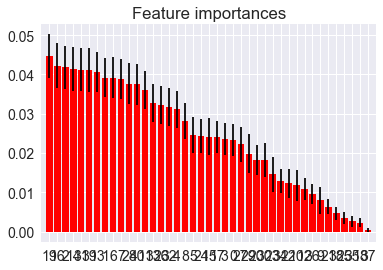

In [126]:
"""
=========================================
Feature importances with forests of trees
=========================================

This examples shows the use of forests of trees to evaluate the importance of
features on an artificial classification task. The red bars are the feature
importances of the forest, along with their inter-trees variability.

As expected, the plot suggests that 3 features are informative, while the
remaining are not.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
''''
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
'''
# Build a forest and compute the feature importances
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] #Trier les datas, et -1 pour le faire le décroissant

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 19 : GrLivArea (0.044661)
2. feature 16 : 1stFlrSF (0.042284)
3. feature 2 : LotArea (0.041816)
4. feature 14 : TotalBsmtSF (0.041479)
5. feature 31 : GarageArea (0.041236)
6. feature 39 : MoSold (0.041169)
7. feature 13 : BsmtUnfSF (0.040631)
8. feature 1 : LotFrontage (0.039227)
9. feature 6 : YearBuilt (0.039117)
10. feature 7 : YearRemodAdd (0.038866)
11. feature 28 : GarageYrBlt (0.037699)
12. feature 40 : YrSold (0.037475)
13. feature 11 : BsmtFinSF1 (0.036019)
14. feature 33 : OpenPorchSF (0.032734)
15. feature 26 : TotRmsAbvGrd (0.032288)
16. feature 32 : WoodDeckSF (0.031716)
17. feature 4 : OverallQual (0.031107)
18. feature 8 : MasVnrArea (0.028180)
19. feature 5 : OverallCond (0.024576)
20. feature 24 : BedroomAbvGr (0.024368)
21. feature 15 : HeatingQC (0.024137)
22. feature 17 : 2ndFlrSF (0.024043)
23. feature 3 : LotShape (0.023505)
24. feature 0 : MSSubClass (0.023283)
25. feature 27 : Fireplaces (0.022200)
26. feature 29 : GarageFinish (0.01

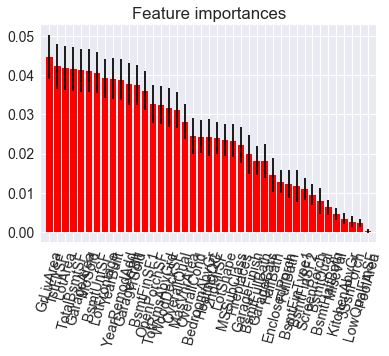

In [127]:


from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

new_list_X_num_col_names = []

for f in range(X.shape[1]):
    
    new_list_X_num_col_names.append(list_X_num_col_names[indices[f]])
    print("%d. feature %d : %s (%f)" % (f + 1, indices[f], list_X_num_col_names[indices[f]] ,importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
#plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=list_X_num_col_names[indices], align="center")
plt.xticks(range(X.shape[1]), new_list_X_num_col_names, rotation = 75)
plt.xlim([-1, X.shape[1]])
plt.show()

(1449, 2)


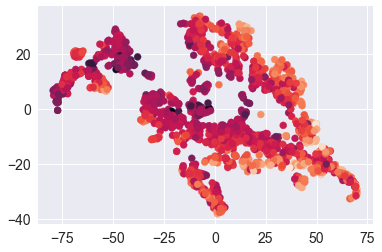

In [122]:
# TSNE

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

from sklearn.datasets.samples_generator import make_blobs

X_tnse = X[:,:]

#print(X_tnse)


# Deuxieme figure : on visualise les blobs en 2D grÃ¢ce a l'algorithme T-SNE
tsne = manifold.TSNE(n_components=2, perplexity=30, init='random',
                     random_state=0)
Y_tsne = tsne.fit_transform(X_tnse)
print(Y_tsne.shape)

plt.figure()
plt.scatter(Y_tsne[:, 0], Y_tsne[:,1], c= Y)
plt.show()

In [129]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
#X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)


# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

ValueError: multiclass format is not supported

MSE: 0.0817


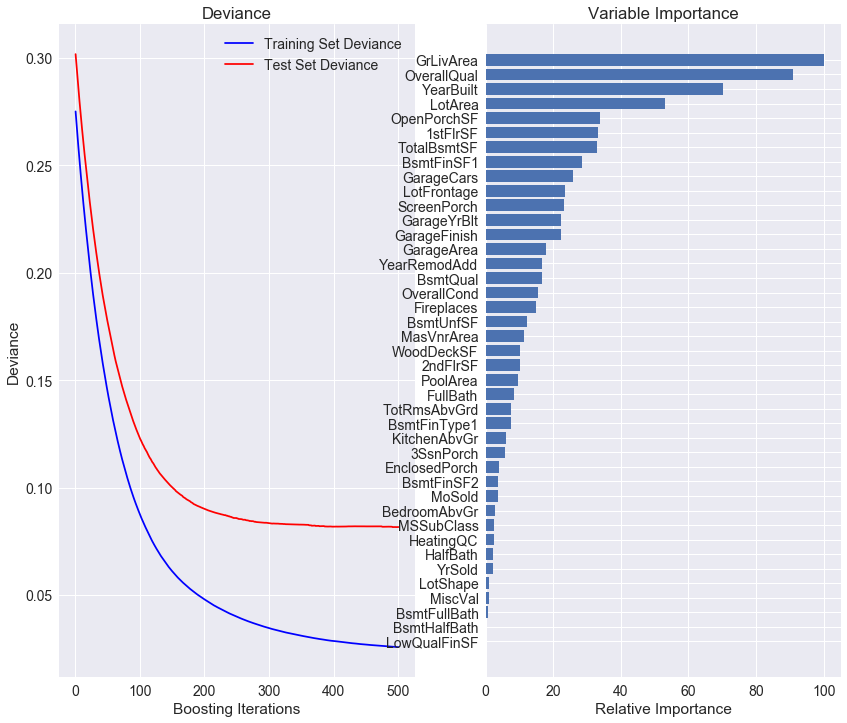

In [143]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
boston = datasets.load_boston()
#X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(14, 12))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, boston.feature_names[sorted_idx])
plt.yticks(pos, list_X_num_col_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [140]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets


#X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test = X[:1350], X[1350:]
y_train, y_test = y[:1350], y[1350:]

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

KeyboardInterrupt: 

In [116]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
lr = linear_model.LinearRegression()
m1=0
m2=0
for el in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=el, test_size=.33)
    model1 = lr.fit(X_train, y_train)
    model2 = lr.fit(X_test, y_test)
    myDiff=abs(model1.score(X_train, y_train)- model2.score(X_test, y_test))
    print(myDiff)
    if myDiff<0.001:
        if model2.score(X_test, y_test)>m2:
            m1=model1.score(X_train, y_train)
            m2=model2.score(X_test, y_test)
            seed=el
print(seed)
print ("R^2 train is: \n", model1.score(X_train, y_train))
model2 = lr.fit(X_test, y_test)
print ("R^2 test is: \n", model2.score(X_test, y_test))


0.08716500174965036
0.08824652137292044
0.08701099829905734
0.0868886749333927
0.09197269372779826
0.06729129547432988
0.04806908973942625
0.06022033777252078
0.025667605229819812
0.056815091127044526
0.02726903854518614
0.057452370959368615
0.06748283812734446
0.07599023468185795
0.025090739193037503
0.06803328649962737
0.0623600438056483
0.07122730747590844
0.01993799046618272
0.04693710993369837
0.06573520719314185
0.08919954118050477
0.044023703422326976
0.018215705741729704
0.09226514487048287
0.007464244961650879
0.047760478130914
0.09093415077840605
0.009915447482765405
0.05884594346816052
0.06817745387760255
0.1064423958200913
0.040426491491466154
0.039906935199143234
0.06543743037149663
0.0640629473231683
0.146045476397213
0.05622074623303486
0.09293982864780115
0.09295429577423142
0.06929463146805093
0.01746293174480118
0.12071025055880458
0.06614847348347186
0.06717405718374359
0.024986641925092146
0.12817933643902157
0.08418589810983879
0.05673799234934729
0.036078969785865

0.04136403501518349
0.03700929573385037
0.022661079908776305
0.12282432335326432
0.053166656151867886
0.12982123487553965
0.06478276974615871
0.11694183495203692
0.017390149898088958
0.06748884535371413
0.09501585520455702
0.0652302205523686
0.07258463275675164
0.07918490870901818
0.07022797857956276
0.07857280171174497
0.0681946428700112
0.10188870230998004
0.06425394242907878
0.07868419142910177
0.05625710853742738
0.07791653678099053
0.02338656614578416
0.09805562881870111
0.017277743697697856
0.02860019450926088
0.036120292155327194
0.04468251083051178
0.12850665069627198
0.11125588624441896
0.0656263274520803
0.09984309172452566
0.05182430626199719
0.016063541601044617
0.05502161344427703
0.053673462056455956
0.0063126455930297976
0.03204621280901021
0.06879508005817381
0.004039500102634763
0.09788973428991565
0.07639766512773127
0.06473208547560083
0.07437483747215101
0.0588661526193508
0.01604325420513164
0.07796528597140506
0.021900046317056665
0.07540292482633282
0.12684453839

0.0718659552993659
0.06970153128200607
0.07376338759450962
0.03763279677454956
0.04948370870732466
0.060718380579300235
0.08642823959504087
0.07359501577294425
0.08313430437767966
0.04183598597629601
0.10983016865726092
0.07666795632195933
0.10027942356406216
0.08880870968096688
0.00594998458545537
0.07709022923948528
0.08059235537088405
0.08841154284529196
0.0736157464140712
0.042958949599204876
0.05469907062467638
0.07677112385927498
0.05445774439837603
0.13166147786213322
0.08551245879170721
0.18272480671179903
0.06818514742987458
0.06816682115126138
0.05516934997358369
0.10338929702448407
0.06614961745602943
0.03118904889439722
0.11010046891734615
0.05098579035430484
0.0550325396961604
0.0853151333948492
0.04543887914909439
0.05000241235203173
0.02619009468795075
0.05649562872565217
0.06699660385421402
0.08611338727539519
0.07496726811458987
0.10978670554081227
0.10757469310580703
0.11142489686429746
0.11033335633286112
0.06714248915200238
0.036275044987167826
0.0022009096021221586

In [ ]:
#Ridge Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
lr = Ridge()
m1=0
m2=0
for el in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=el, test_size=.33)
    model3 = lr.fit(X_train, y_train)
    model4 = lr.fit(X_test, y_test)
    myDiff=abs(model3.score(X_train, y_train)- model4.score(X_test, y_test))
    
    if myDiff<0.001:
        if model4.score(X_test, y_test)>m2:
            m1=model3.score(X_train, y_train)
            print(el, m1)
            m2=model4.score(X_test, y_test)
            print(el, m2)
            seed=el
print(seed)
print ("R^2 train is: \n", model3.score(X_train, y_train))
model2 = lr.fit(X_test, y_test)
print ("R^2 test is: \n", model4.score(X_test, y_test))


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



m1=0
m2=0
for el in range(1000):
    X_train, y_train = make_classification(n_samples=1000, n_features=4, 
                                       n_informative=2, n_redundant=0,
                                       random_state=0, shuffle=False)
    
    clf = RandomForestClassifier(max_depth=2, random_state=el)
    model5=clf.fit(X_train, y_train)
    model6=clf.fit(X_test, y_test)
    
   
    
    if myDiff<0.001:
        if model4.score(X_test, y_test)>m2:
            m1=model3.score(X_train, y_train)
            print(el, m1)
            m2=model4.score(X_test, y_test)
            print(el, m2)
            seed=el
print(seed)
print ("R^2 train is: \n", model3.score(X_train, y_train))
model2 = lr.fit(X_test, y_test)
print ("R^2 test is: \n", model4.score(X_test, y_test))


In [ ]:
#SVM
#Random Forest
#Gradient Boosted Trees
#Adaboost
#Neural Networks

In [ ]:
lr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, random_state=159, test_size=0.01)
model2 = lr.fit(X_train, y_train)
print ("R^2 test is: \n", model2.score(X_train, y_train))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = ts.Id

In [ ]:
print(X.shape)
print(feats.shape)

In [ ]:
set(feats)-set(X)

In [ ]:
feats = ts.select_dtypes(include=[np.number]).fillna(ts.select_dtypes(include=[np.number]).median())

In [ ]:
predictions = model2.predict(feats)

In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

In [ ]:
submission['SalePrice'] = final_predictions
submission.head()

In [ ]:
submission.to_csv('submission1.csv', index=False)